# Chi - Square Test

In [20]:
import scipy.stats as stats

In [43]:
import seaborn as sns
import pandas as pd
import numpy as np


In [44]:

dataset = sns.load_dataset('tips')

# dataset= pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

In [45]:
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
dataset.shape

(244, 7)

In [7]:
dataset_table = pd.crosstab(dataset['sex'],dataset['smoker'])

In [8]:
dataset_table

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [12]:
dataset_table.values

array([[60, 97],
       [33, 54]])

In [16]:
observed_value = dataset_table.values
print("Observed Value :-  \n",observed_value)

Observed Value :-  
 [[60 97]
 [33 54]]


In [21]:
val=stats.chi2_contingency(dataset_table)

In [23]:
val

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]]))

In [26]:
expected_value = val[3]

In [32]:
expected_value,observed_value

(array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]),
 array([[60, 97],
        [33, 54]]))

In [36]:
no_of_rows = len(dataset_table.iloc[0:2,0])
no_of_columns = len(dataset_table.iloc[0,0:2])

ddof = (no_of_rows-1)*(no_of_columns-1)
print('degrree of freedom',ddof)


degrree of freedom 1


In [38]:
alpha = 0.05

In [42]:
from scipy.stats import chi2

In [47]:
chi_square = sum([(o-e)**2.0/e for o,e in zip(observed_value,expected_value)])

In [50]:
chi_square_statistic = chi_square[0] + chi_square[1]

In [52]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 0.001934818536627623


In [54]:
critical_value = chi2.ppf(q=1-alpha,df=ddof)
print("critical_value:", critical_value)

critical_value: 3.841458820694124


In [56]:
p_value = 1- chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value',p_value)
print('Significance level: ' ,alpha)
print('Degree of Freedom',ddof)


p-value 0.964915107315732
Significance level:  0.05
Degree of Freedom 1


In [57]:
if chi_square_statistic >=critical_value:
    print("Reject H0, There is a relationship between 2 categoriphical variables")
else:
    print("Retain H0,there is no relationship between2 categorical variables")

Retain H0,there is no relationship between2 categorical variables


In [59]:
if p_value <=alpha:
    print("Reject H0, There is a relationship between 2 categoriphical variables")
else:
    print("Retain H0,there is no relationship between2 categorical variables")

Retain H0,there is no relationship between2 categorical variables


# T - Test

A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features

T-test has 2 types : 1. one sampled t-test 2. two-sampled t-test.

In [89]:
np.random.seed(4)  # Constantness in randomeness

In [69]:
ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23]

In [70]:
len(ages)

28

In [71]:
import numpy as np

ages_mean = np.mean(ages)
ages_mean

30.035714285714285

In [68]:
sample_size = 10


In [139]:
ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23]
np.random.seed(123)
age_sample = np.random.choice(ages,sample_size)

age_sample.sort()
age_sample

array([17, 18, 18, 23, 24, 26, 30, 35, 35, 55])

In [142]:
from scipy.stats import ttest_1samp

val = ttest_1samp(age_sample,ages_mean)
val

TtestResult(statistic=-0.5308032538245625, pvalue=0.608402229636366, df=9)

In [144]:
p_value = val[1]
p_value

0.608402229636366

In [146]:
if(p_value < 0.05):
    print("reject null Hypothesis")
else:
    print("accept null Hypothesis")

accept null Hypothesis


# 1 more example

In [149]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
np.random.seed(6)
school_ages=stats.poisson.rvs(loc=18,mu=35,size=1500)
classA_ages=stats.poisson.rvs(loc=18,mu=30,size=60)

school_ages,classA_ages

(array([62, 59, 44, ..., 45, 52, 50]),
 array([52, 46, 40, 40, 47, 50, 51, 45, 44, 52, 46, 53, 43, 44, 51, 50, 54,
        42, 54, 45, 61, 53, 49, 46, 47, 41, 45, 51, 43, 45, 48, 50, 40, 52,
        44, 55, 54, 40, 45, 46, 54, 42, 46, 35, 51, 51, 46, 48, 47, 35, 52,
        52, 39, 44, 48, 40, 42, 46, 47, 45]))

In [150]:
school_ages.mean(),classA_ages.mean()

(53.303333333333335, 46.9)

In [173]:
val = ttest_1samp(a=classA_ages,popmean=school_ages.mean())
val

TtestResult(statistic=-9.604796510704091, pvalue=1.139027071016194e-13, df=59)

In [157]:
p_value = val[1]
p_value


1.139027071016194e-13

In [158]:
1e5 == 1*(10**5)

100000.0

In [167]:
abc = 1*(10**-15)
'{:.20f}'.format(p_value)


'0.00000000000011390271'

In [169]:
if(p_value < 0.05):
    print("reject null Hypothesis")
else:
    print("accept null Hypothesis")

reject null Hypothesis


# 2 Sample T - Test

In [180]:
np.random.seed(12)
ClassB_ages=stats.poisson.rvs(loc=18,mu=33,size=60)
ClassB_ages.mean(),classA_ages.mean()

(50.63333333333333, 46.9)

In [176]:
_,p_value  = stats.ttest_ind(a=classA_ages,b=ClassB_ages,equal_var=False)

In [178]:
p_value

0.0003994209510085936

In [185]:
if(p_value < 0.05):
    print("reject null Hypothesis")
else:
    print("accept null Hypothesis")

reject null Hypothesis


100000.0

# Paired T- test

In [187]:
weight1=[25,30,28,35,28,34,26,29,30,26,28,32,31,30,45]
weight2=weight1+stats.norm.rvs(scale=5,loc=-1.25,size=15)

In [193]:
weight1,weight2

([25, 30, 28, 35, 28, 34, 26, 29, 30, 26, 28, 32, 31, 30, 45],
 array([30.57926457, 34.91022437, 29.00444617, 30.54295091, 19.86201983,
        37.57873174, 18.3299827 , 21.3771395 , 36.36420881, 32.05941216,
        26.93827982, 29.519014  , 26.42851213, 30.50667769, 41.32984284]))

In [195]:
weight_ds = pd.DataFrame({"weight_before":np.array(weight1),
                         "weight_after":np.array(weight2),
                         "weight_change":np.array(weight1)-np.array(weight2)})

In [197]:
weight_ds

,weight_before,weight_after,weight_change
0,25,30.579265,-5.579265
1,30,34.910224,-4.910224
2,28,29.004446,-1.004446
3,35,30.542951,4.457049
4,28,19.862020,8.137980
5,34,37.578732,-3.578732
6,26,18.329983,7.670017
7,29,21.377139,7.622861
8,30,36.364209,-6.364209
9,26,32.059412,-6.059412


In [198]:
_,pvalue = stats.ttest_rel(a=weight1,b=weight2)


In [200]:
pvalue

0.5732936534411279

In [205]:
if(pvalue < 0.05):
    print("reject null Hypothesis")
else:
    print("accept null Hypothesis")

accept null Hypothesis


# Correlation

In [238]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [234]:
iris.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [211]:
iris.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [231]:
np.sort(np.array(iris.petal_length))

array([1. , 1.1, 1.2, 1.2, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.4, 1.4,
       1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.6, 1.6,
       1.6, 1.6, 1.6, 1.6, 1.6, 1.7, 1.7, 1.7, 1.7, 1.9, 1.9, 3. , 3.3,
       3.3, 3.5, 3.5, 3.6, 3.7, 3.8, 3.9, 3.9, 3.9, 4. , 4. , 4. , 4. ,
       4. , 4.1, 4.1, 4.1, 4.2, 4.2, 4.2, 4.2, 4.3, 4.3, 4.4, 4.4, 4.4,
       4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.6, 4.6, 4.6, 4.7,
       4.7, 4.7, 4.7, 4.7, 4.8, 4.8, 4.8, 4.8, 4.9, 4.9, 4.9, 4.9, 4.9,
       5. , 5. , 5. , 5. , 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.2,
       5.2, 5.3, 5.3, 5.4, 5.4, 5.5, 5.5, 5.5, 5.6, 5.6, 5.6, 5.6, 5.6,
       5.6, 5.7, 5.7, 5.7, 5.8, 5.8, 5.8, 5.9, 5.9, 6. , 6. , 6.1, 6.1,
       6.1, 6.3, 6.4, 6.6, 6.7, 6.7, 6.9])

In [232]:
np.sort(np.array(iris.petal_width))

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.5, 0.6, 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1.1, 1.1, 1.1, 1.2, 1.2, 1.2, 1.2, 1.2,
       1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3,
       1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.6, 1.6, 1.6, 1.6, 1.7, 1.7,
       1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.9,
       1.9, 1.9, 1.9, 1.9, 2. , 2. , 2. , 2. , 2. , 2. , 2.1, 2.1, 2.1,
       2.1, 2.1, 2.1, 2.2, 2.2, 2.2, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3,
       2.3, 2.4, 2.4, 2.4, 2.5, 2.5, 2.5])

/Users/admin/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


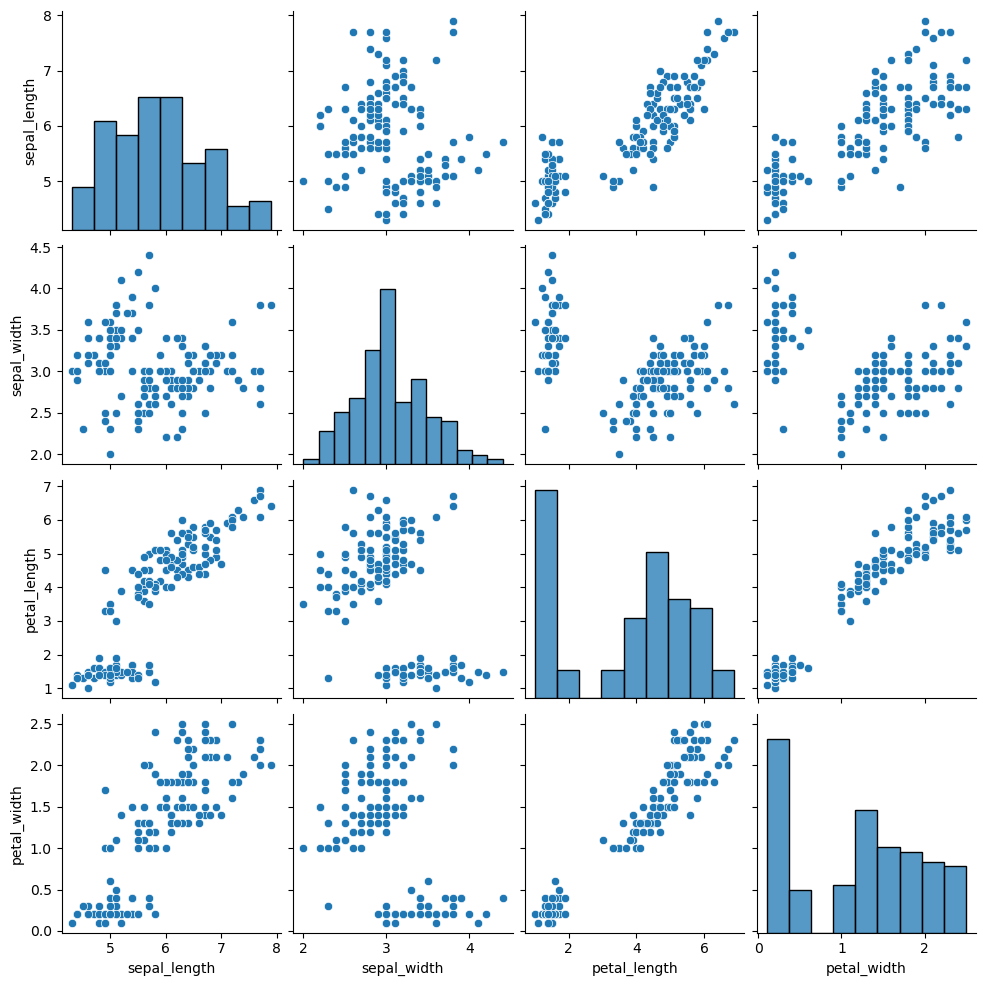

In [217]:
sns.pairplot(iris)

In [233]:
import datetime 
datetime.datetime.now()

# 1 min

datetime.datetime(2024, 6, 8, 16, 56, 39, 644248)

# Anova Test ( F-test)

The t-test works well when dealing with two groups, but sometimes we want to compare more than two groups at the same time.


For example, if we wanted to test whether petal_width age differs based on some categorical variable like species, we have to compare the means of each level or group the variable

In [249]:
iris.values

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


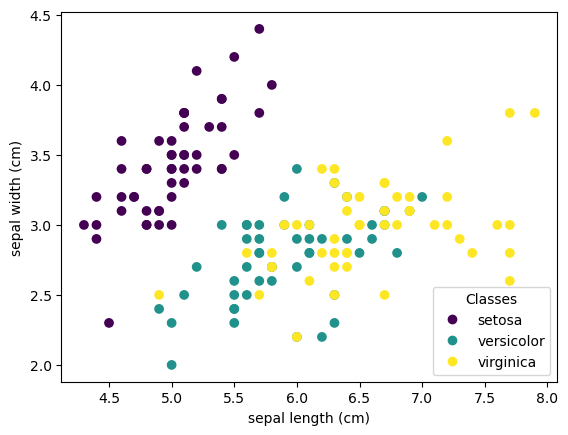

In [240]:
import matplotlib.pyplot as plt
from sklearn import datasets

iris_2 = datasets.load_iris()
_, ax = plt.subplots()
scatter = ax.scatter(iris_2.data[:, 0], iris_2.data[:, 1], c=iris_2.target)
ax.set(xlabel=iris_2.feature_names[0], ylabel=iris_2.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris_2.target_names, loc="lower right", title="Classes"
)

In [250]:
groups = pd.unique(iris.species.values)
groups

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [252]:
df_anova = iris[['petal_width','species']]
df_anova

,petal_width,species
0,0.2,setosa
1,0.2,setosa
2,0.2,setosa
3,0.2,setosa
4,0.2,setosa
...,...,...
145,2.3,virginica
146,1.9,virginica
147,2.0,virginica
148,2.3,virginica


In [256]:
combined_data_by_species = {grp:df_anova['petal_width'][df_anova.species == grp] for grp in  groups}
combined_data_by_species

{'setosa': 0     0.2
 1     0.2
 2     0.2
 3     0.2
 4     0.2
 5     0.4
 6     0.3
 7     0.2
 8     0.2
 9     0.1
 10    0.2
 11    0.2
 12    0.1
 13    0.1
 14    0.2
 15    0.4
 16    0.4
 17    0.3
 18    0.3
 19    0.3
 20    0.2
 21    0.4
 22    0.2
 23    0.5
 24    0.2
 25    0.2
 26    0.4
 27    0.2
 28    0.2
 29    0.2
 30    0.2
 31    0.4
 32    0.1
 33    0.2
 34    0.2
 35    0.2
 36    0.2
 37    0.1
 38    0.2
 39    0.2
 40    0.3
 41    0.3
 42    0.2
 43    0.6
 44    0.4
 45    0.3
 46    0.2
 47    0.2
 48    0.2
 49    0.2
 Name: petal_width, dtype: float64,
 'versicolor': 50    1.4
 51    1.5
 52    1.5
 53    1.3
 54    1.5
 55    1.3
 56    1.6
 57    1.0
 58    1.3
 59    1.4
 60    1.0
 61    1.5
 62    1.0
 63    1.4
 64    1.3
 65    1.4
 66    1.5
 67    1.0
 68    1.5
 69    1.1
 70    1.8
 71    1.3
 72    1.5
 73    1.2
 74    1.3
 75    1.4
 76    1.4
 77    1.7
 78    1.5
 79    1.0
 80    1.1
 81    1.0
 82    1.2
 83    1.6
 84    1.5
 85  

In [257]:
combined_data_by_species['setosa']

0     0.2
1     0.2
2     0.2
3     0.2
4     0.2
5     0.4
6     0.3
7     0.2
8     0.2
9     0.1
10    0.2
11    0.2
12    0.1
13    0.1
14    0.2
15    0.4
16    0.4
17    0.3
18    0.3
19    0.3
20    0.2
21    0.4
22    0.2
23    0.5
24    0.2
25    0.2
26    0.4
27    0.2
28    0.2
29    0.2
30    0.2
31    0.4
32    0.1
33    0.2
34    0.2
35    0.2
36    0.2
37    0.1
38    0.2
39    0.2
40    0.3
41    0.3
42    0.2
43    0.6
44    0.4
45    0.3
46    0.2
47    0.2
48    0.2
49    0.2
Name: petal_width, dtype: float64

In [258]:
F,p = stats.f_oneway(combined_data_by_species['setosa'],combined_data_by_species['versicolor'],combined_data_by_species['virginica'])

In [259]:
print(p)

4.169445839443116e-85


In [260]:
'{:.100f}'.format(p)

'0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000004169445839443116'

In [261]:
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis
